In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#Reading the csv file dataframe
concrete_df = pd.read_csv('concrete.csv')

### 1.) Exploratory Data Analysis 

In [3]:
#Displaying the top 10 rows of the dataframe
concrete_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


##### This shows that there are 9 attributes that are numeric in nature.

### a) Univariate Data Analysis

In [4]:
#Displaying the data type of each attribute
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
#Displaying the shape of the dataframe
concrete_df.shape

(1030, 9)

##### This shows that there are 1030 rows and 9 columns in the dataframe.

In [6]:
#Checking the null/missing values in the dataframe
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

##### This shows that there are no null or missing values in the dataframe.

In [7]:
# Displaying the five point summary of the given dataframe
concrete_df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


##### Description of the independent attributes 

##### 1.) Cement

In [8]:
#Displaying the range
print('Range of values of cement (in Kg in a m3 mixture) :',concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values of cement (in Kg in a m3 mixture) : 438.0


In [9]:
#Displaying the central values
print('Minimum Value :', concrete_df['cement'].min())
print('Maximum Value :', concrete_df['cement'].max())
print('Mean :', concrete_df['cement'].mean())
print('Median :', concrete_df['cement'].median())
print('Standard Deviation :', concrete_df['cement'].std())

Minimum Value : 102.0
Maximum Value : 540.0
Mean : 281.1678640776698
Median : 272.9
Standard Deviation : 104.50636449481536


In [10]:
#Displaying the quartiles
from scipy import stats
Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [11]:
# Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in cement(RHS) : ', concrete_df[concrete_df['cement']>U_outliers]['cement'].count())
print('Number of outliers in cement(LHS) : ', concrete_df[concrete_df['cement']<L_outliers]['cement'].count())

Number of outliers in cement(RHS) :  0
Number of outliers in cement(LHS) :  0


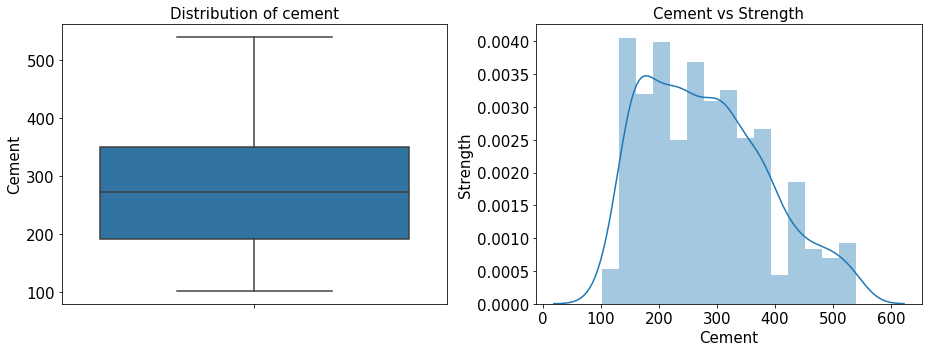

In [12]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are no outliers in cement attrbute and variation of cement and strength is slightly right skewed.

#### 2.) Slag

In [13]:
#Displaying the range
print('Range of values of slag (in Kg in a m3 mixture) :',concrete_df['slag'].max()-concrete_df['slag'].min())

Range of values of slag (in Kg in a m3 mixture) : 359.4


In [17]:
#Displaying the central values
print('Minimum Value :', concrete_df['slag'].min())
print('Maximum Value :', concrete_df['slag'].max())
print('Mean :', concrete_df['slag'].mean())
print('Median :', concrete_df['slag'].median())
print('Standard Deviation :', concrete_df['slag'].std())

Minimum Value : 0.0
Maximum Value : 359.4
Mean : 73.89582524271844
Median : 22.0
Standard Deviation : 86.2793417481054


In [14]:
#Displaying the quartiles
Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [15]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in slag(RHS) : ', concrete_df[concrete_df['slag']>U_outliers]['slag'].count())
print('Number of outliers in slag(LHS) : ', concrete_df[concrete_df['slag']<L_outliers]['slag'].count())

Number of outliers in slag(RHS) :  2
Number of outliers in slag(LHS) :  0


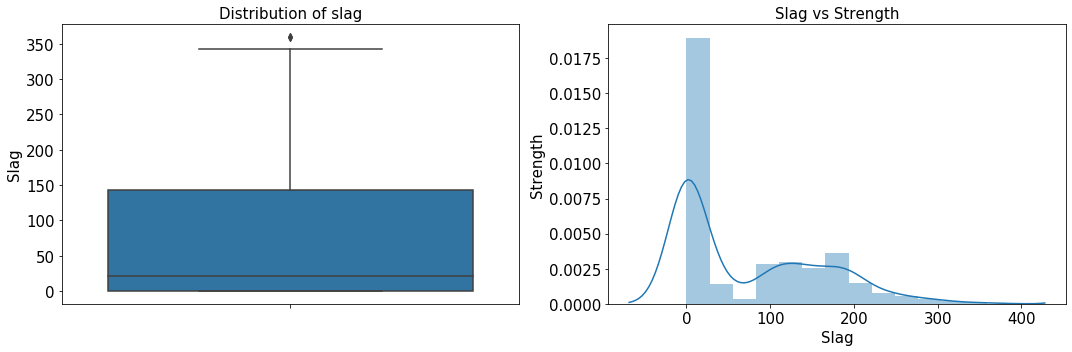

In [16]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

###### From the above boxplot we can again conclude that there are few outliers in slag attrbute and variation of slag and strength is right skewed.

#### 3.) Ash

In [17]:
#Displaying the range
print('Range of values of ash (in Kg in a m3 mixture) :',concrete_df['ash'].max()-concrete_df['ash'].min())

Range of values of ash (in Kg in a m3 mixture) : 200.1


In [22]:
#Displaying the central values
print('Minimum Value :', concrete_df['ash'].min())
print('Maximum Value :', concrete_df['ash'].max())
print('Mean :', concrete_df['ash'].mean())
print('Median :', concrete_df['ash'].median())
print('Standard Deviation :', concrete_df['ash'].std())

Minimum Value : 0.0
Maximum Value : 200.1
Mean : 54.188349514563086
Median : 0.0
Standard Deviation : 63.99700415268794


In [18]:
#Displaying the quartiles
Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [19]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in ash(RHS) : ', concrete_df[concrete_df['ash']>U_outliers]['ash'].count())
print('Number of outliers in ash(LHS) : ', concrete_df[concrete_df['ash']<L_outliers]['ash'].count())

Number of outliers in ash(RHS) :  0
Number of outliers in ash(LHS) :  0


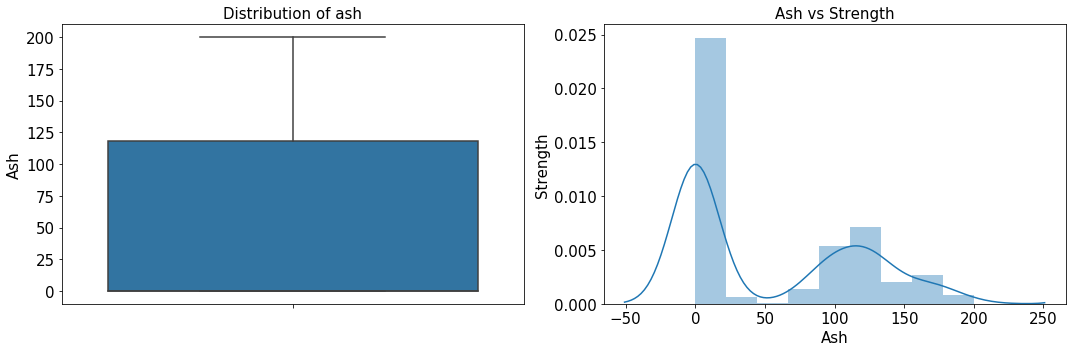

In [20]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are no outliers in ash attrbute and variation of ash and strength is right skewed with aprroximately two normal peaks.

##### 4.) Water 

In [21]:
#Displaying the range
print('Range of values of water (in Kg in a m3 mixture) :',concrete_df['water'].max()-concrete_df['water'].min())

Range of values of water (in Kg in a m3 mixture) : 125.2


In [22]:
#Displaying the central values
print('Minimum Value :', concrete_df['water'].min())
print('Maximum Value :', concrete_df['water'].max())
print('Mean :', concrete_df['water'].mean())
print('Median :', concrete_df['water'].median())
print('Standard Deviation :', concrete_df['water'].std())

Minimum Value : 121.8
Maximum Value : 247.0
Mean : 181.56728155339798
Median : 185.0
Standard Deviation : 21.35421856503245


In [23]:
#Displaying the quartiles
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [24]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in water(RHS) : ', concrete_df[concrete_df['water']>U_outliers]['water'].count())
print('Number of outliers in water(LHS) : ', concrete_df[concrete_df['water']<L_outliers]['water'].count())

Number of outliers in water(RHS) :  4
Number of outliers in water(LHS) :  5


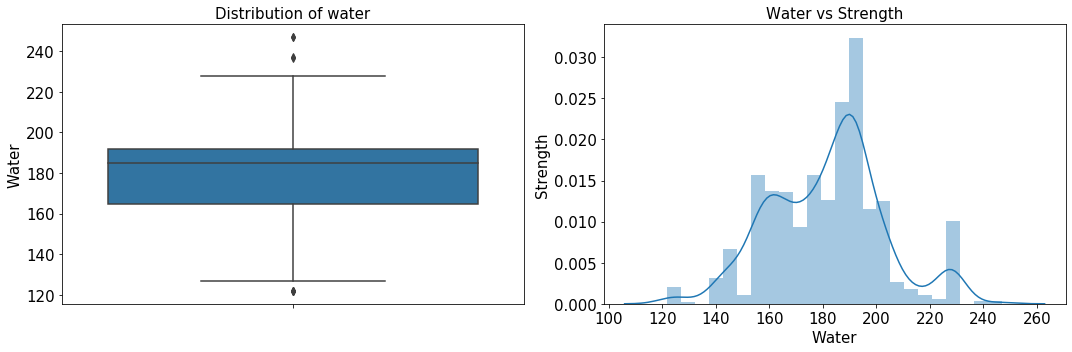

In [25]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are few outliers in water attrbute and variation of water and strength is left skewed.

##### 5.) Superplastic

In [26]:
#Displaying the range
print('Range of values of superplastic (in Kg in a m3 mixture) :',concrete_df['superplastic'].max()-concrete_df['superplastic'].min())

Range of values of superplastic (in Kg in a m3 mixture) : 32.2


In [27]:
#Displaying the central values
print('Minimum Value :', concrete_df['superplastic'].min())
print('Maximum Value :', concrete_df['superplastic'].max())
print('Mean :', concrete_df['superplastic'].mean())
print('Median :', concrete_df['superplastic'].median())
print('Standard Deviation :', concrete_df['superplastic'].std())

Minimum Value : 0.0
Maximum Value : 32.2
Mean : 6.204660194174756
Median : 6.4
Standard Deviation : 5.973841392485508


In [28]:
#Displaying the quartiles
Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [29]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in superplastic(RHS) : ', concrete_df[concrete_df['superplastic']>U_outliers]['superplastic'].count())
print('Number of outliers in superplastic(LHS) : ', concrete_df[concrete_df['superplastic']<L_outliers]['superplastic'].count())

Number of outliers in superplastic(RHS) :  10
Number of outliers in superplastic(LHS) :  0


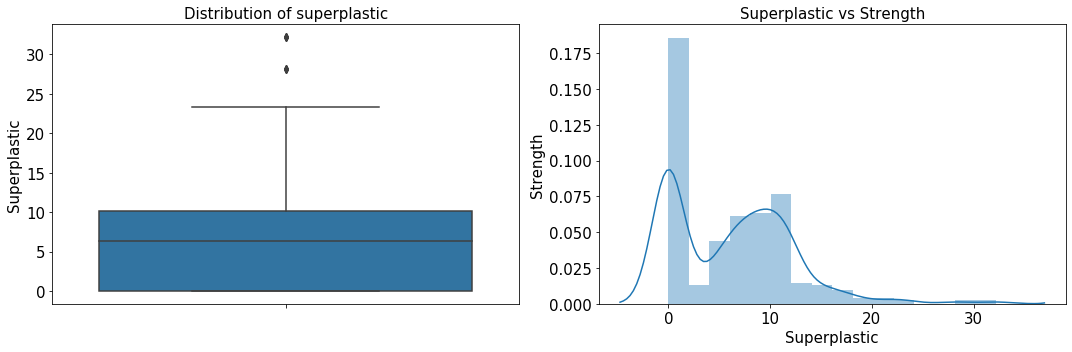

In [30]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are few outliers in superplastic attribute and variation of superplastic and strength is right skewed. Also the long tail in the graph implies that there are outliers.

##### 6.) Coarseagg

In [31]:
#Displaying the range
print('Range of values of coarseagg (in Kg in a m3 mixture) :',concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())

Range of values of coarseagg (in Kg in a m3 mixture) : 344.0


In [32]:
#Displaying the central values
print('Minimum Value :', concrete_df['coarseagg'].min())
print('Maximum Value :', concrete_df['coarseagg'].max())
print('Mean :', concrete_df['coarseagg'].mean())
print('Median :', concrete_df['coarseagg'].median())
print('Standard Deviation :', concrete_df['coarseagg'].std())

Minimum Value : 801.0
Maximum Value : 1145.0
Mean : 972.918932038835
Median : 968.0
Standard Deviation : 77.75395396672087


In [33]:
#Displaying the quartiles
Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3rd Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [34]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in coarseagg(RHS) : ', concrete_df[concrete_df['coarseagg']>U_outliers]['coarseagg'].count())
print('Number of outliers in coarseagg(LHS) : ', concrete_df[concrete_df['coarseagg']<L_outliers]['coarseagg'].count())

Number of outliers in coarseagg(RHS) :  0
Number of outliers in coarseagg(LHS) :  0


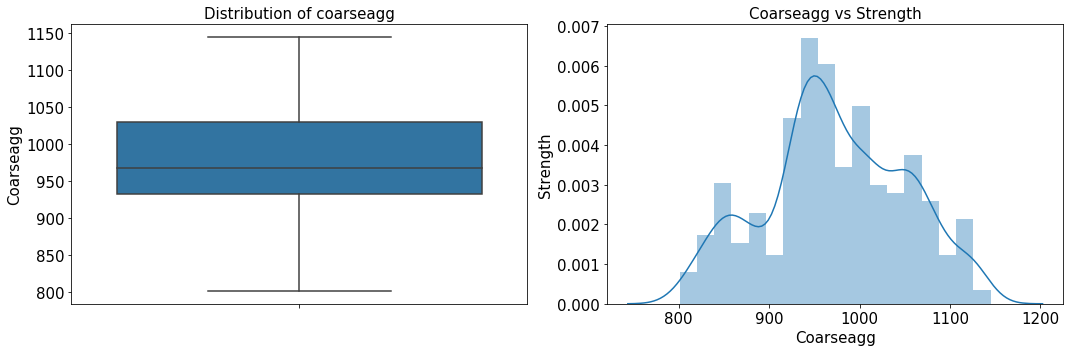

In [35]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are no outliers in coarseagg attribute.

##### 7.) Fineagg

In [36]:
#Displaying the range
print('Range of values of fineagg (in Kg in a m3 mixture) :',concrete_df['fineagg'].max()-concrete_df['fineagg'].min())

Range of values of fineagg (in Kg in a m3 mixture) : 398.6


In [37]:
#Displaying the central values
print('Minimum Value :', concrete_df['fineagg'].min())
print('Maximum Value :', concrete_df['fineagg'].max())
print('Mean :', concrete_df['fineagg'].mean())
print('Median :', concrete_df['fineagg'].median())
print('Standard Deviation :', concrete_df['fineagg'].std())

Minimum Value : 594.0
Maximum Value : 992.6
Mean : 773.5804854368932
Median : 779.5
Standard Deviation : 80.17598014240443


In [38]:
#Displaying the quartiles
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3rd Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [39]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in fineagg(RHS) : ', concrete_df[concrete_df['fineagg']>U_outliers]['fineagg'].count())
print('Number of outliers in fineagg(LHS) : ', concrete_df[concrete_df['fineagg']<L_outliers]['fineagg'].count())

Number of outliers in fineagg(RHS) :  5
Number of outliers in fineagg(LHS) :  0


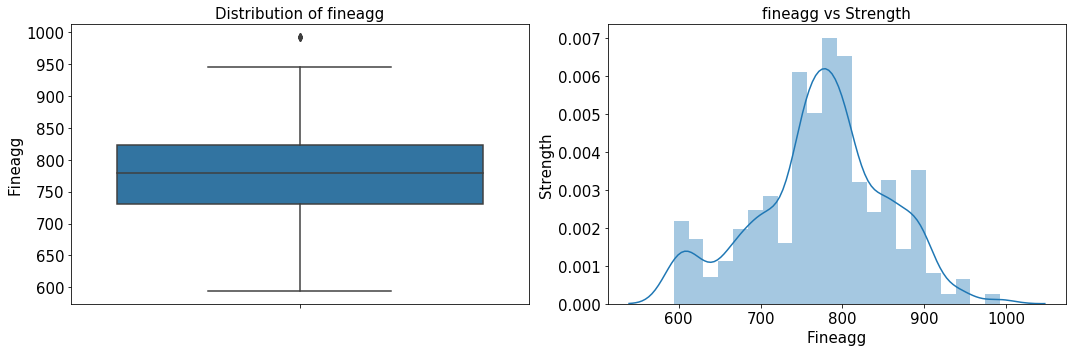

In [40]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are few outliers in fineagg attribute.

##### 8.) Age

In [41]:
#Displaying the range
print('Range of values of age(in day (1~365)) :',concrete_df['age'].max()-concrete_df['age'].min())

Range of values of age(in day (1~365)) : 364


In [42]:
#Displaying the central values
print('Minimum Value :', concrete_df['age'].min())
print('Maximum Value :', concrete_df['age'].max())
print('Mean :', concrete_df['age'].mean())
print('Median :', concrete_df['age'].median())
print('Standard Deviation :', concrete_df['age'].std())

Minimum Value : 1
Maximum Value : 365
Mean : 45.662135922330094
Median : 28.0
Standard Deviation : 63.16991158103279


In [43]:
#Displaying the quartiles
Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3rd Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [44]:
#Outlier detection from Interquartile range (IQR) in original data
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Number of outliers in age(RHS) : ', concrete_df[concrete_df['age']>U_outliers]['age'].count())
print('Number of outliers in age(LHS) : ', concrete_df[concrete_df['age']<L_outliers]['age'].count())

Number of outliers in age(RHS) :  59
Number of outliers in age(LHS) :  0


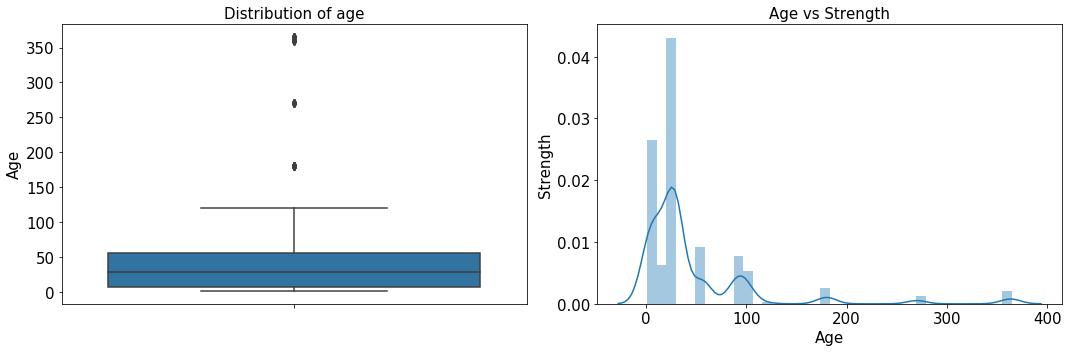

In [45]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### From the above boxplot we can again conclude that there are many outliers in age attribute and variation of age and strength is right skewed. Also the long tail in the graph implies that there are many outliers.

### b) Multivariate Analysis

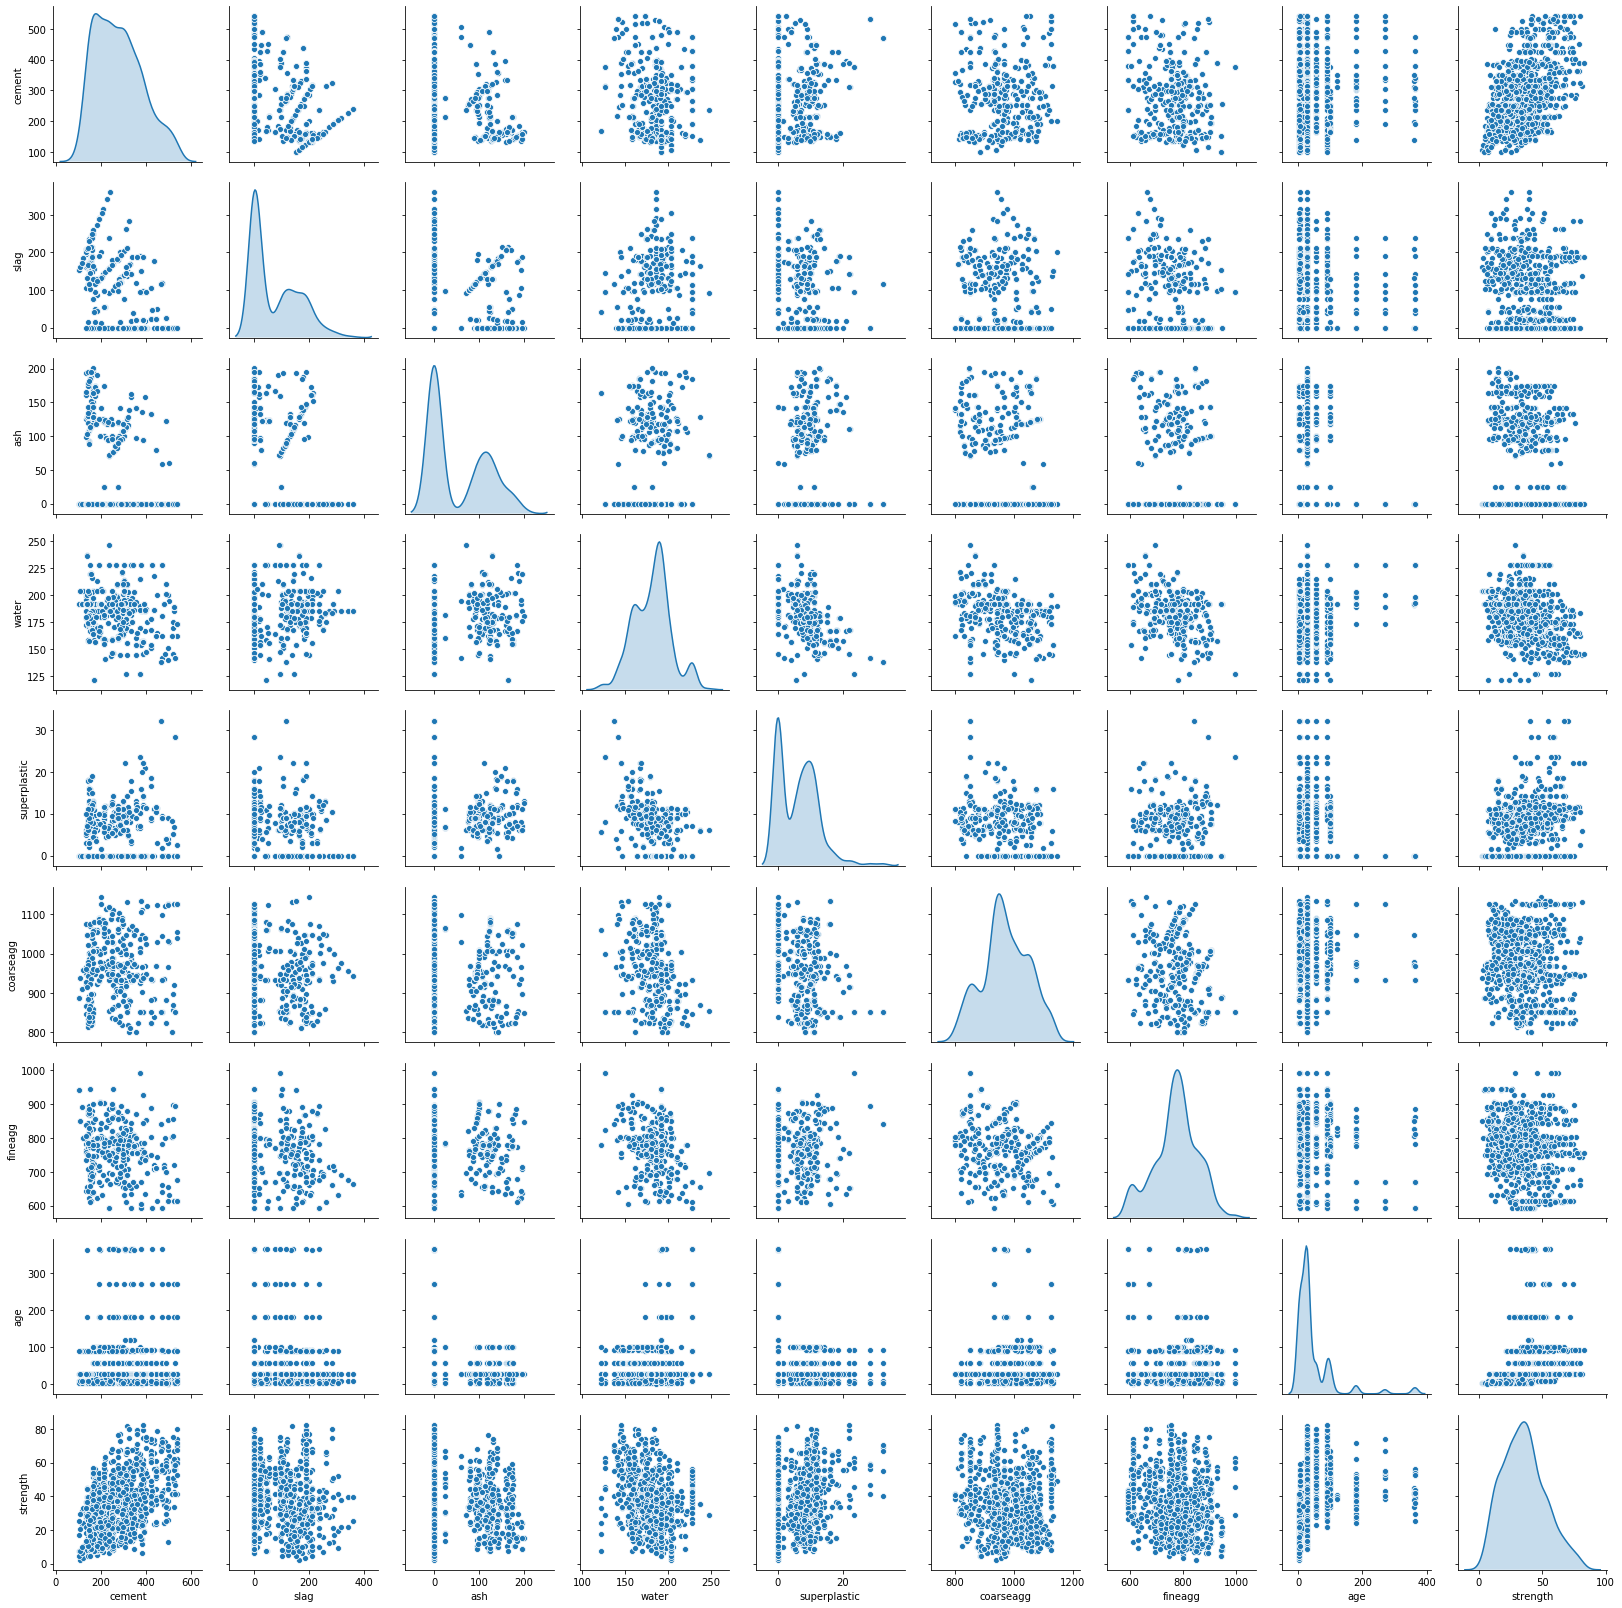

In [46]:
# plotting the relationship between the given attributes using pairplot
sns.pairplot(concrete_df, diag_kind='kde')
plt.show()

##### From the above graphs let us conclude the following observations.

###### Diagonals Analysis (The diagonal gives the same information as we got using distplot before in univariate analysis.)

1. Cement attribute have almost normal curve.
2. Slag has two gausssians and rightly skewed.Its long tail shows the presence of outliers.
3. Ash has two gaussians and rightly skewed.
4. Water has multiple gaussians and is slighly left skewed.It shows the presence of outliers.
5. Superplastic has multiple gaussians and rightly skewed.Its long tail shows the presence of outliers.
6. Coarseagg has three guassians and is almost normal.
7. Fineagg has almost two guassians and looks like normal.
8. Age has multiple guassians and rightly skewed. It shows the presence of outliers.
9. Strength is close to a normal curve.

##### Off Diagonal Analysis: Relationship between indpendent attributes
###### Scatter plots
1. Cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. 
2. Slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. 
3. Ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud.
4. Water vs other independent attributes: This attribute has negative linear relationship with superplastic and fineagg. However, it does not have any significant relationship with other independent atributes. 
5. Superplastic vs other independent attributes:This attribute have negative linear relationship with water only. However, it does not have any significant relationship with other independent attributes.
6. Coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud.
7. fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. 
Since, from the above conclusion we have got no independent attributes that are highly correlated to each other so we cannot reduce any dimensions.  

######  Strength attribute : Relationship between dependent and independent attributes
Now from the above graphs let us compare the relationship we can conclude between the target column with all other independent attributes. 
1. strength vs cement: It is slightly linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have  multiple values of strength.Thus,it is a weak predictor.
2. strength vs slag/ash/superplastic/coarseagg/fineagg/age: There is no particular trend.
3. strength vs water:  It is slightly linearly related to the water. The relationship is negative and we can see that for a given value of water we have  multiple values of strength.Thus,it is a weak predictor.
4. Age column does not constitute any meanigful estimation regarding the concrete strength


Text(0.5, 1, 'Correlation between different attributes')

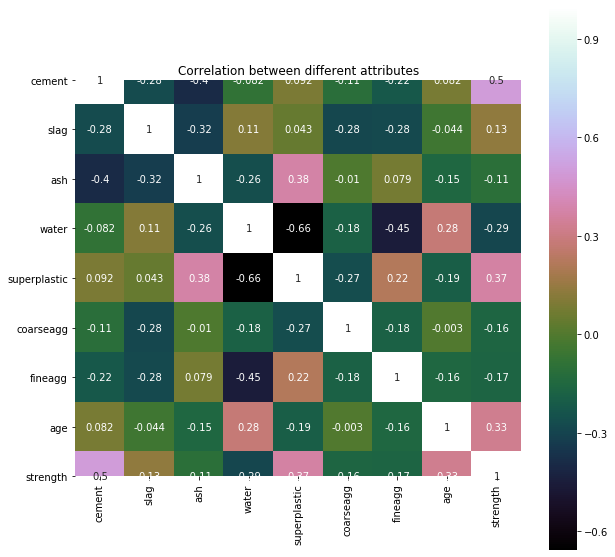

In [47]:
# Now let us visualize correlation between these attributes
correlation = concrete_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between different attributes')

###### From the above heatmap also we got the same conclusion that we have received while analysing the pairplot that 
1. Cement, age and superplastic are strongly (positive values) related to strength.
2. Water, ash, coarseagg, fineagg, slag are weakly (negative and near 0.2 values ) related to strength.
3. Correlation between cement and the target variable is 0.5, by this we can say that cement is a strong predictor variable

#### Handling the outliers

In [48]:
#Number of outliers present in the dataframe
concrete_df1=concrete_df.copy()
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


In [49]:
#Records which contains the outliers in the different attribute
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64
Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64
Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64
Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


In [50]:
#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

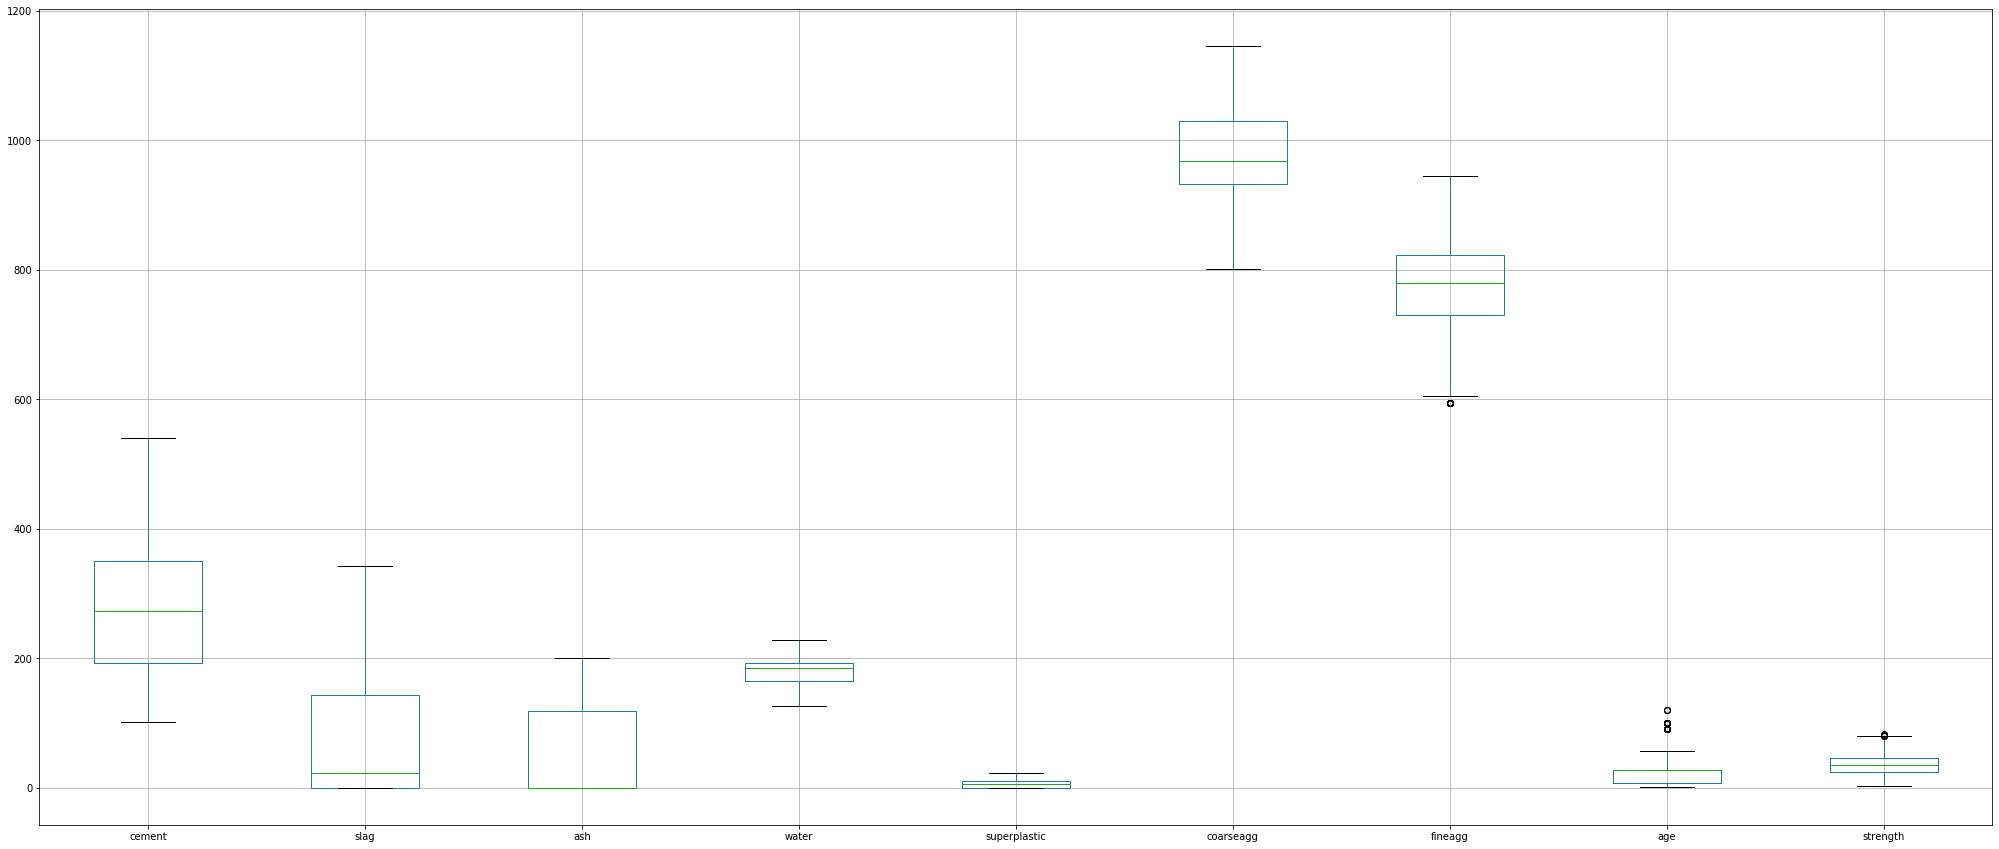

In [51]:
# Again check for outliers in dataframe using boxplot
concrete_df1.boxplot(figsize=(35,15))
plt.show()

### 2.) Feature engineering techniques 

In [52]:
#Scaling the dataframe
from scipy.stats import zscore
concrete_df_z = concrete_df1.apply(zscore)


In [53]:
concrete_df_z = pd.DataFrame(concrete_df_z , columns  = concrete_df.columns)
concrete_df_z.describe()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,-3.858833e-16,3.054730e-16,3.634633e-16,-6.866137e-17,1.427122e-16,7.116206e-16,-9.696666e-16,-8.903342e-17,-3.729487e-17
std,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715253e+00,-8.581924e-01,-8.471439e-01,-2.673363e+00,-1.091166e+00,-2.212138e+00,-2.269700e+00,-1.124724e+00,-2.005552e+00
25%,-8.500535e-01,-8.581924e-01,-8.471439e-01,-8.135261e-01,-1.091166e+00,-5.265174e-01,-5.287740e-01,-9.088206e-01,-7.251305e-01
50%,-7.915193e-02,-6.004090e-01,-8.471439e-01,1.625242e-01,7.788973e-02,-6.329352e-02,8.712870e-02,-1.531587e-01,-8.222491e-02
75%,6.589606e-01,8.141775e-01,1.002278e+00,5.024422e-01,7.491832e-01,7.267605e-01,6.312079e-01,-1.531587e-01,6.178744e-01
max,2.477915e+00,3.150340e+00,2.281084e+00,2.250592e+00,3.183193e+00,2.214224e+00,2.192258e+00,3.157360e+00,2.801717e+00


In [54]:
#Spliting the independent and dependent variables
y = concrete_df_z[['strength']]
X = concrete_df_z.drop(labels= "strength" , axis = 1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [56]:
print(X_test.shape)
print(y_test.shape)

(309, 8)
(309, 1)


#### Decision Tree Regression

In [57]:
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
#Displaying the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.349149
slag          0.095868
ash           0.011429
water         0.127962
superplastic  0.017240
coarseagg     0.033007
fineagg       0.036619
age           0.328726



1. So, cement, age and water are significant attributes.
2. Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [59]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
y_pred = dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance on testing data using Decision Tree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy Decision Tree: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Decision Tree: 0.9917907393004437
Performance on testing data using Decision Tree: 0.8124877721667224
Accuracy Decision Tree:  0.8124877721667224
MSE:  0.19573655002597873


There is a overfitting in the model as the dataframe is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

In [60]:
#Storing the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.812488


#### K Fold cross validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8611546115634436
Standard Deviation:  0.04076043905900989


In [62]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155


###### Iteration 2 
###### Dropping the insignificant attributes

In [63]:
concrete_df_z.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [64]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [65]:
drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic' , 'strength']
X = concrete_df2.drop(labels= drop_cols , axis = 1)
y = concrete_df2['strength']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [67]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [68]:
#Displaying the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
              Imp
cement  0.385804
slag    0.107810
water   0.177011
age     0.329375


In [69]:
y_pred = dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',dt_model.score(X_train,y_train))
print('Performance on testing data using Decision Tree:',dt_model.score(X_test,y_test))
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy Decision Tree: ',acc_DT)

Performance on training data using Decision Tree: 0.990059622939761
Performance on testing data using Decision Tree: 0.8446721524987044
Accuracy Decision Tree:  0.8446721524987044


The acuracy on testing dataset is still not improved, so we can again say that it is an overfit model.

In [70]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree 2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672


##### Regularising/Pruning of Decision Tree


In [71]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [72]:
# Regularizing the Decision tree and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [73]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


Here, we can see that ash,coarseagg and fineagg are least significant variable.

In [74]:
from IPython.display import Image  
from sklearn import tree
from os import system

C_Tree_File = open('concrete_tree.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file=C_Tree_File, feature_names = list(X_train))

C_Tree_File.close()
  


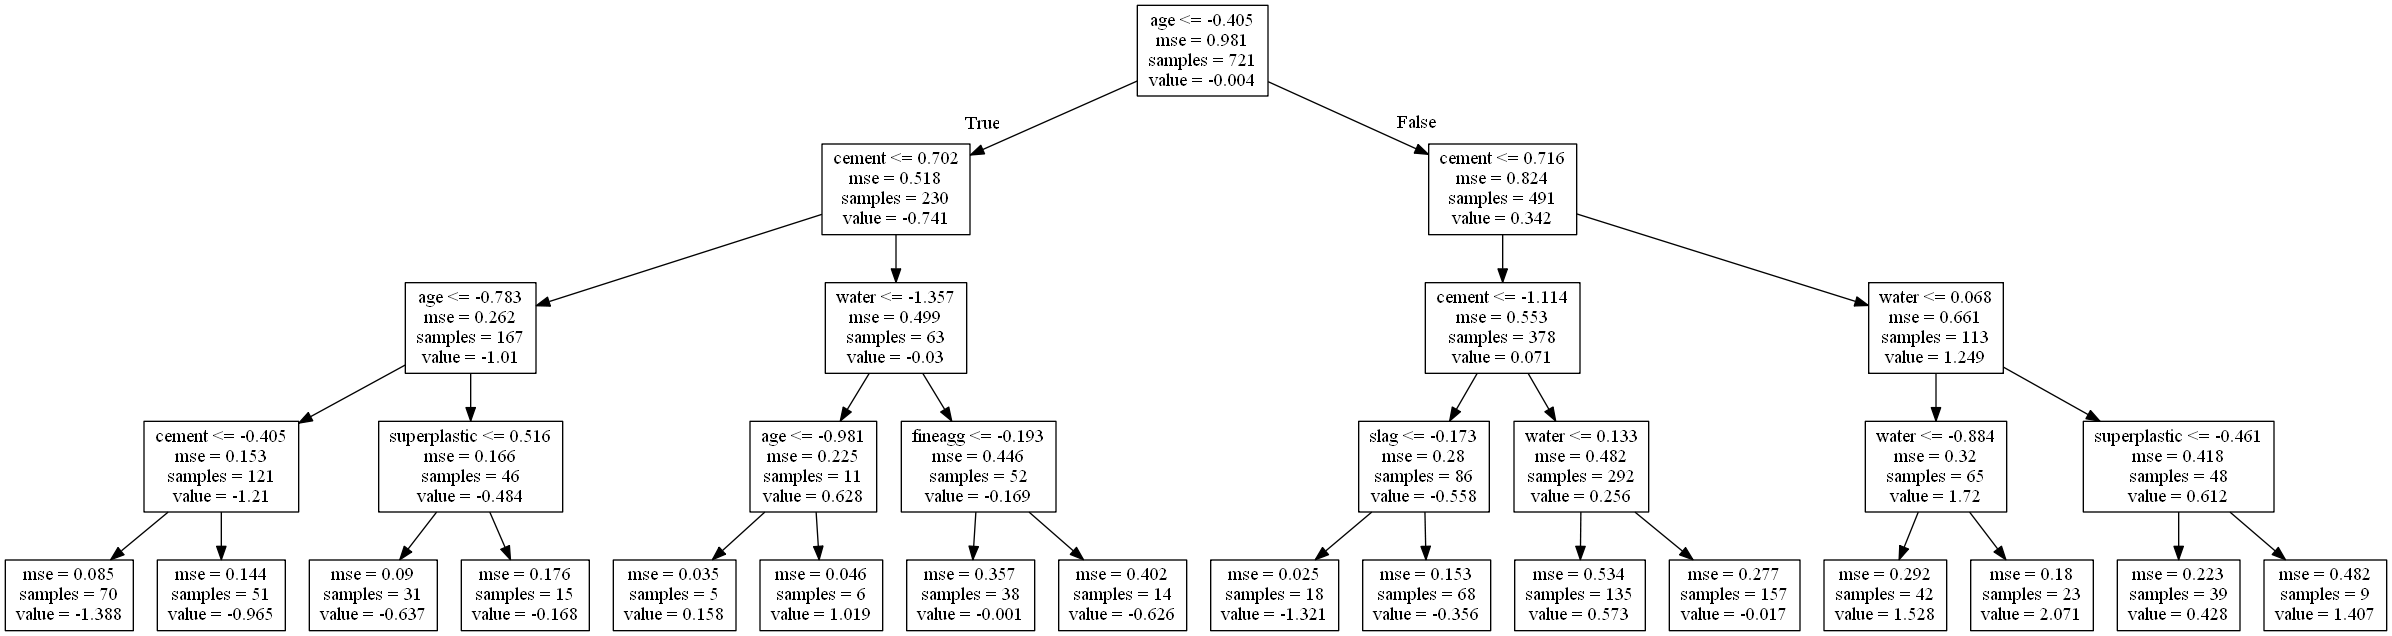

In [75]:
system("dot -Tpng concrete_tree.dot -o concrete_tree.png")
Image("concrete_tree.png")

In [76]:
y_pred = reg_dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',reg_dt_model.score(X_train,y_train))
print('Performance on testing data using Decision Tree:',reg_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy Decision Tree: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Decision Tree: 0.7255811799299218
Performance on testing data using Decision Tree: 0.6548277186105129
Accuracy Decision Tree:  0.6548277186105129
MSE:  0.36031160369896825


In [77]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828


##### K fold cross validation

In [78]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6819101662123233
Standard Deviation:  0.06252311979215476


In [79]:
#Storing the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910


###### Iteration 2 
###### Dropping the insignificant attributes

In [80]:
concrete_df3=concrete_df_z.copy()

In [81]:
drop_cols = ['ash' , 'coarseagg' , 'fineagg'  , 'strength']
X = concrete_df3.drop(labels= drop_cols , axis = 1)
y = concrete_df3['strength']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [83]:
reg2_dt_model = DecisionTreeRegressor(max_depth = 4,random_state=1,min_samples_leaf=5)
reg2_dt_model.fit(X_train , y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [84]:
y_pred = reg2_dt_model.predict(X_test)
print('Performance on training data using Decision Tree:',reg2_dt_model.score(X_train,y_train))
print('Performance on testing data using Decision Tree:',reg2_dt_model.score(X_test,y_test))
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy Decision Tree: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Decision Tree: 0.7249584363084667
Performance on testing data using Decision Tree: 0.6634677033758938
Accuracy Decision Tree:  0.6634677033758938
MSE:  0.35129266754854116


In [85]:
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree 2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468


#### K Means Clustering

In [86]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.775014e+07
2,3,2.141117e+07
3,4,1.869846e+07
4,5,1.659098e+07
5,6,1.502922e+07
6,7,1.371261e+07
7,8,1.230865e+07
8,9,1.138810e+07
9,10,1.044094e+07


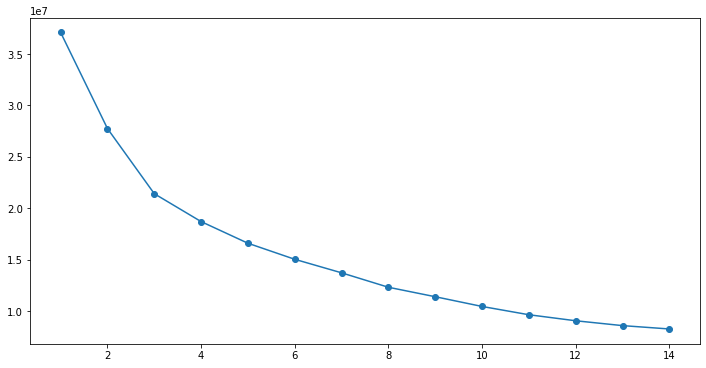

In [87]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [88]:
# From the above plot we have k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [89]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)


In [90]:
centroids = cluster.cluster_centers_
centroids

array([[-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [-0.60282287, -0.65663952,  1.10691052, -0.61327163,  0.49168022,
         0.62337539,  0.43508059,  0.27502291, -0.13528454],
       [ 0.3112026 , -0.83641215, -0.78154411,  0.44337009, -1.00073639,
         0.49854218,  0.39671798, -0.24628184, -0.68238245],
       [-0.87010755,  1.41482728, -0.84485042,  0.60549346, -0.75810292,
        -0.0430217 , -0.16744124, -0.16350135, -0.56135812],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ],
       [ 1.45045591, -0.42924132, -0.69489669,  1.30649175, -1.00149369,
         0.19438938, -1.65956143,  0.15842921,  0.70494449]])

In [91]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
1,-0.602823,-0.656640,1.106911,-0.613272,0.491680,0.623375,0.435081,0.275023,-0.135285
2,0.311203,-0.836412,-0.781544,0.443370,-1.000736,0.498542,0.396718,-0.246282,-0.682382
3,-0.870108,1.414827,-0.844850,0.605493,-0.758103,-0.043022,-0.167441,-0.163501,-0.561358
4,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521
5,1.450456,-0.429241,-0.694897,1.306492,-1.001494,0.194389,-1.659561,0.158429,0.704944


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027663A37FC8>,
      dtype=object)

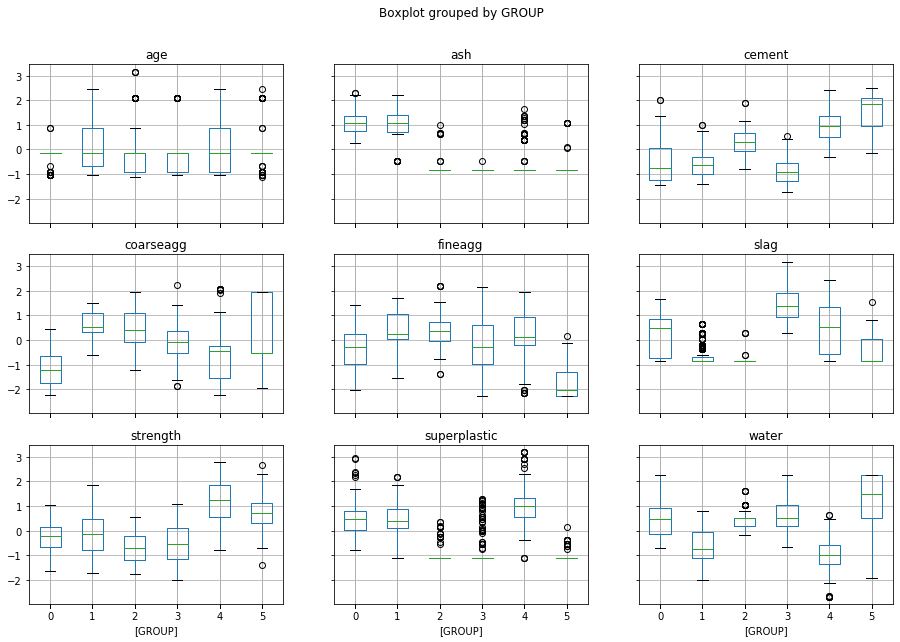

In [92]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the
## centroids and the data in the cluster into box plots.
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

From the above plots we can conclude that 
1. No distinct clusters are visible.
2. It seems that attributes are weak predictors except for cement. 
3. Thus, the potential of getting better results by breaking data into clusters is unlikely to give the desired result.

##### Random Forest Regressor

In [93]:
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [94]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [95]:
y_pred = model.predict(X_test)
print('Performance on training data using Random Forest Regressor:',model.score(X_train,y_train))
print('Performance on testing data using Random Forest Regressor:',model.score(X_test,y_test))
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy Random Forest Regressor: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Random Forest Regressor: 0.9726873341512476
Performance on testing data using Random Forest Regressor: 0.9036504291840062
Accuracy Random Forest Regressor:  0.9036504291840061
MSE:  0.10057548142820091


This model also overfits.

In [96]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650


##### K fold cross validation

In [97]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8938798044851746
Standard Deviation:  0.02992878207206327


In [98]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880


#### Gradient Boosting Regressor

In [99]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [100]:
y_pred = model.predict(X_test)
print('Performance on training data using Gradient Boosting Regressor:',model.score(X_train,y_train))
print('Performance on testing data using Gradient Boosting Regressor:',model.score(X_test,y_test))
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy Gradient Boosting Regressor: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Gradient Boosting Regressor: 0.9430469892492805
Performance on testing data using Gradient Boosting Regressor: 0.89211825763336
Accuracy Gradient Boosting Regressor:  0.89211825763336
MSE:  0.11261345622970663


In [101]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118


##### K fold cross validation

In [102]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8994683238459192
Standard Deviation:  0.016889713904979963


In [103]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


#### Ada Boosting Regressor

In [104]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [105]:
y_pred = model.predict(X_test)
print('Performance on training data using Ada Boosting Regressor:',model.score(X_train,y_train))
print('Performance on testing data using Ada Boosting Regressor:',model.score(X_test,y_test))
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy Ada Boosting Regressor: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Ada Boosting Regressor: 0.8174694394729489
Performance on testing data using Ada Boosting Regressor: 0.7613950459207367
Accuracy Ada Boosting Regressor:  0.7613950459207367
MSE:  0.24907021302156182


In [106]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


##### K fold cross validation

In [107]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7741584526637559
Standard Deviation:  0.030392163883726713


In [108]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


#### Bagging Regressor

In [109]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [110]:
y_pred = model.predict(X_test)
print('Performance on training data using Bagging Regressor:',model.score(X_train,y_train))
print('Performance on testing data using Bagging Regressor:',model.score(X_test,y_test))
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy Bagging Regressor: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Bagging Regressor: 0.9727876050189109
Performance on testing data using Bagging Regressor: 0.881973156839514
Accuracy Bagging Regressor:  0.881973156839514
MSE:  0.123203523085607


In [111]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


##### K fold cross validation

In [112]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.8989769306056765
Standard Deviation:  0.02354877566513587


In [113]:
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


#### KNN Regressor

In [114]:
from sklearn.neighbors import KNeighborsRegressor
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

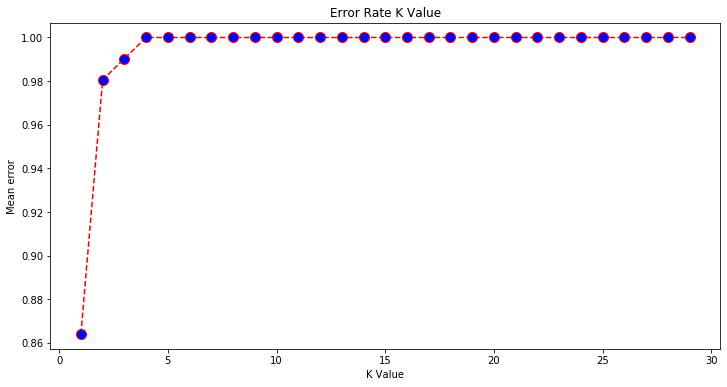

In [115]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [116]:
#From the above plot we get k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [117]:
y_pred = model.predict(X_test)
print('Performance on training data using K Neighbors Regressor:',model.score(X_train,y_train))
print('Performance on testing data using K Neighbors Regressor:',model.score(X_test,y_test))
acc_KNR=metrics.r2_score(y_test, y_pred)
print('Accuracy K Neighbors Regressor: ',acc_KNR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using K Neighbors Regressor: 0.8902196318573777
Performance on testing data using K Neighbors Regressor: 0.8078817663272165
Accuracy K Neighbors Regressor:  0.8078817663272165
MSE:  0.20054457616295157


In [118]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_KNR]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


##### K fold cross validation

In [119]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7947547097467347
Standard Deviation:  0.03961462765692188


In [120]:
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


#### Support Vector Regressor

In [121]:
from sklearn.svm import SVR
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [122]:
y_pred = model.predict(X_test)
print('Performance on training data using Support Vector Regressor:',model.score(X_train,y_train))
print('Performance on testing data using Support Vector Regressor:',model.score(X_test,y_test))
acc_SVR=metrics.r2_score(y_test, y_pred)
print('Accuracy Support Vector Regressor: ',acc_SVR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Support Vector Regressor: 0.7195312919938222
Performance on testing data using Support Vector Regressor: 0.6932035001931365
Accuracy Support Vector Regressor:  0.6932035001931365
MSE:  0.32025265299303374


In [123]:
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_SVR]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


##### K fold cross validation

In [124]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [125]:
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


In [126]:
#Multiple model Ensemble
from sklearn.linear_model import LinearRegression
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [127]:
from sklearn.ensemble import VotingRegressor
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='linear', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False))],
                n_jobs=None, weights=None)

In [128]:
y_pred = evc.predict(X_test)
print('Performance on training data using Ensemble:',evc.score(X_train,y_train))
print('Performance on testing data using Ensemble:',evc.score(X_test,y_test))
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy Ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using Ensemble: 0.8213604308836657
Performance on testing data using Ensemble: 0.7849191766894734
Accuracy Ensemble:  0.7849191766894734
MSE:  0.22451430937603256


In [129]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


##### K fold cross validation

In [130]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796722


In [131]:
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.812488
2,Decision Tree k fold,0.861155
3,Decision Tree 2,0.844672
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.681910
6,Pruned Decision Tree 2,0.663468
7,Random Forest Regressor,0.903650
8,Random Forest Regressor k fold,0.893880
9,Gradient Boost Regressor,0.892118
10,Gradient Boost Regressor k fold,0.899468


From the above table we can conclude that
1. After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
2. Now as the dataframe has different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

#### Bootstrap Sampling Using Gradient Boost Regressor

In [132]:
concrete_XY = X.join(y)

In [133]:
from sklearn.utils import resample
values = concrete_XY.values

n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(concrete_df_z) * 1)    # size of a bootstrap sample

# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration
for i in range(n_iterations):

    # prepare train and test sets
	train = resample(values, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
    # fit model
	gbmTree = GradientBoostingRegressor(n_estimators=50)
	gbmTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
	y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
	predictions = gbmTree.predict(test[:, :-1])   # predict based on independent variables in the test data
	score = gbmTree.score(test[:, :-1] , y_test)

	stats.append(score)

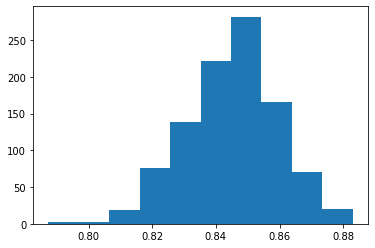

95.0 confidence interval 81.6% and 87.1%


In [134]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


##### Using Random Forest Regressor

In [135]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

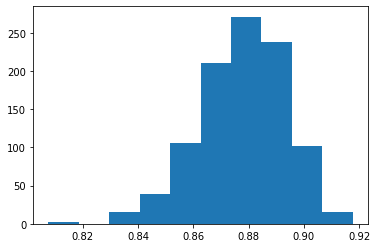

95.0 confidence interval 84.3% and 90.4%


In [136]:
from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

##### Conclusion
Chosen model :The bootstrap random forest classification model performance is between 84%-90.8% which is better than other  algorithms.